In [147]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



### Exploratory Data Analysis

In [148]:
d = pd.read_csv(r'C:\Users\Zehra\Desktop\ML\data\Chocolate Sales.csv')
d['Amount'] = d['Amount'].replace('[\$,]', '', regex=True).astype(float)
d.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [149]:
chocolate_data = pd.read_csv(r'C:\Users\Zehra\Desktop\ML\data\Chocolate Sales.csv')
chocolate_data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [150]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [151]:
chocolate_data['Amount'] = chocolate_data['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [152]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   float64
 5   Boxes Shipped  1094 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 51.4+ KB


In [153]:
chocolate_data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574.0,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086.0,384


- What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise,
and Others)? How do their performances compare?


In [113]:
chocolate_data.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64

- Which country (Australia, India, or Others) contributes the most to the total sales
revenue? What percentage of the total revenue does it account for?


In [114]:
country_cont = chocolate_data.groupby('Country')['Amount'].sum()
country_cont

Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1051792.0
USA            1035349.0
Name: Amount, dtype: float64

In [115]:
country_cont/chocolate_data['Amount'].sum()*100

Country
Australia      18.393208
Canada         15.571756
India          16.912410
New Zealand    15.369917
UK             17.009311
USA            16.743399
Name: Amount, dtype: float64

- How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites,
Eclairs, or Others) has the highest number of transactions?


In [116]:
len(chocolate_data['Product'].unique())

22

In [117]:
prod_dist = chocolate_data['Product'].value_counts().sort_values(ascending = False)

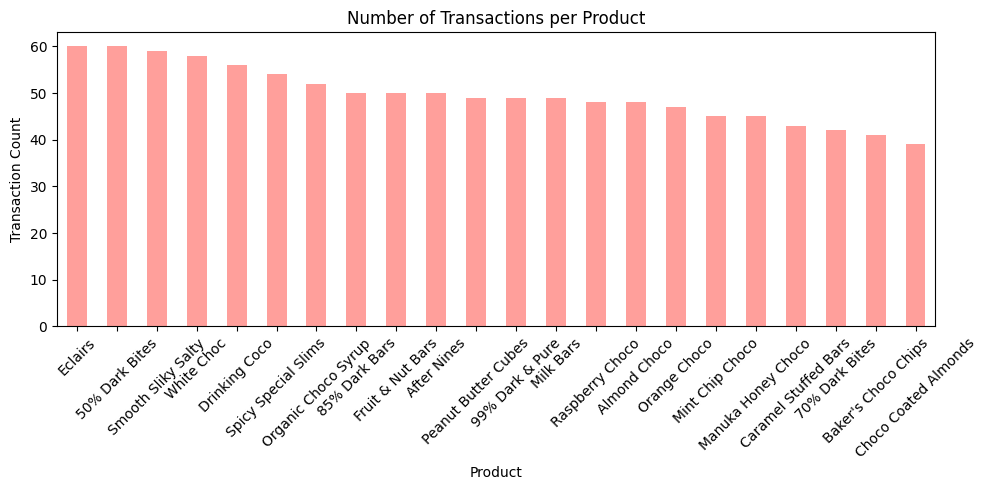

In [118]:
chocolate_data['Product'].value_counts().plot(kind='bar', figsize=(10, 5), color='#ff9f9b')

plt.title('Number of Transactions per Product')
plt.xlabel('Product')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- What is the trend of sales over time based on the Date column? Identify the month or
period with the highest transaction count.


In [154]:
chocolate_data['Date'] = pd.to_datetime(chocolate_data['Date'], format="%d-%b-%y")

In [155]:
chocolate_data['Month'] = chocolate_data['Date'].dt.month
chocolate_data['Year'] = chocolate_data['Date'].dt.year
chocolate_data['DayOfWeek'] = chocolate_data['Date'].dt.dayofweek

In [156]:
chocolate_data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,DayOfWeek
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,1,2022,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,8,2022,0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,7,2022,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4,2022,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2,2022,3
...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,5,2022,1
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,6,2022,1
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,7,2022,1
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,7,2022,3


In [121]:
chocolate_data['Year'].value_counts()

Year
2022    1094
Name: count, dtype: int64

In [122]:
chocolate_data['Month'].value_counts()

Month
6    163
1    154
7    149
5    135
8    134
3    131
4    118
2    110
Name: count, dtype: int64

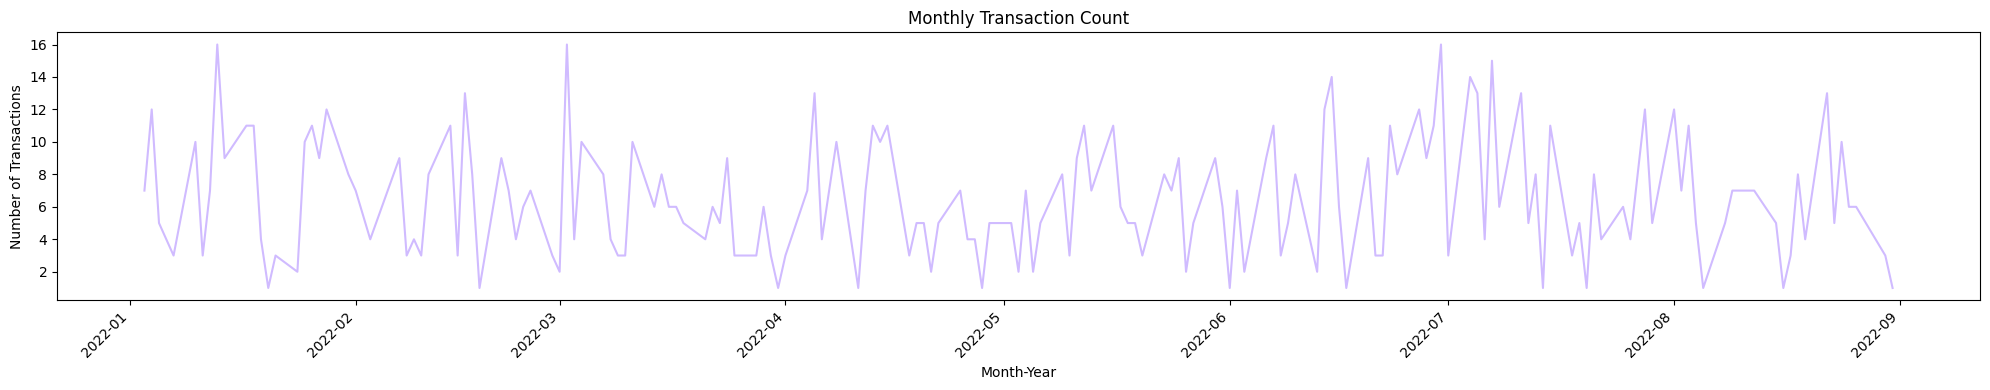

In [123]:
date_counts = chocolate_data['Date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(20, 4))
date_counts.plot(kind='line', color='#d0bbff')
plt.title('Monthly Transaction Count')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

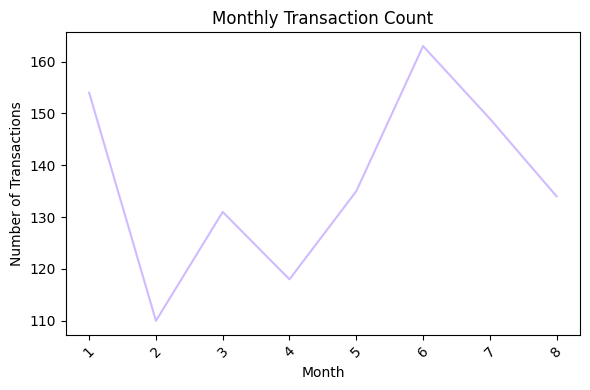

In [124]:
monthly_counts = chocolate_data['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
monthly_counts.plot(kind='line', color='#d0bbff')
plt.title('Monthly Transaction Count')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- What is the distribution of the Amount column? Are there any outliers in the revenue
generated per transaction (e.g., values above 638.20 or below 1.00)?

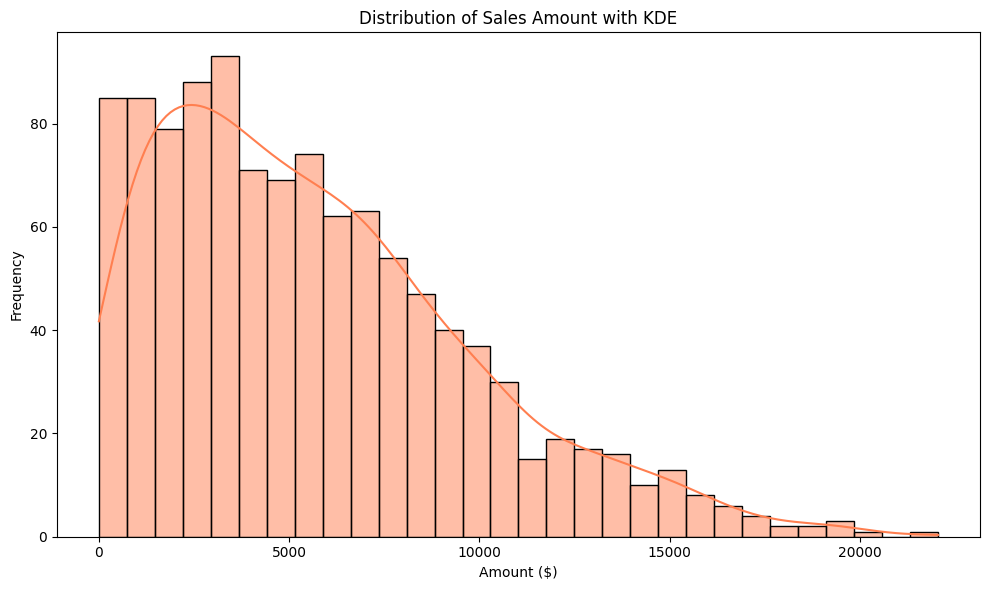

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(chocolate_data['Amount'], bins=30, kde=True, color='coral')
plt.title('Distribution of Sales Amount with KDE')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

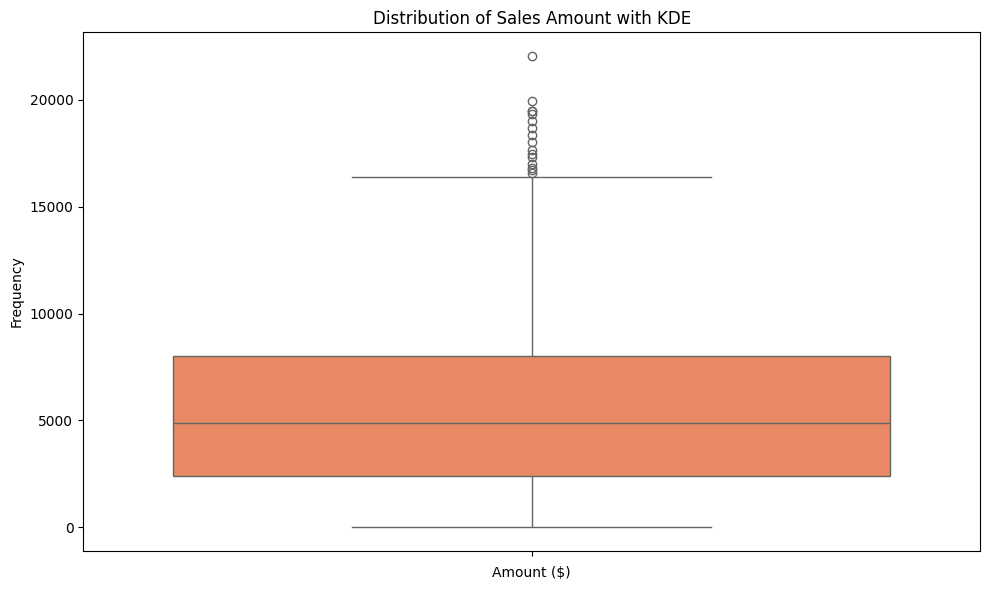

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(chocolate_data['Amount'], color='coral')
plt.title('Distribution of Sales Amount with KDE')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [127]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
 7   Year           1094 non-null   int32         
 8   DayOfWeek      1094 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 64.2+ KB


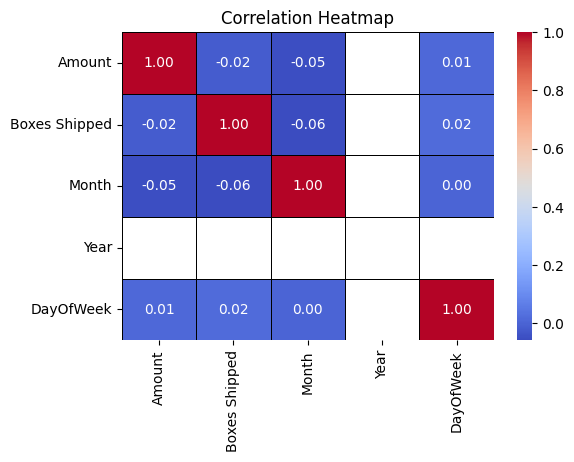

In [157]:
corr = chocolate_data.corr(numeric_only=True)  # Add numeric_only=True if mixed dtypes

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

- Which salesperson shipped the most boxes of chocolate? Does this align with their total
revenue contribution?

In [129]:

boxes_by_salesperson = chocolate_data.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
revenue_by_salesperson = chocolate_data.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
print("Salesperson who shipped the most boxes:")
print(boxes_by_salesperson.head(1))

print("\nSalesperson with highest revenue:")
print(revenue_by_salesperson.head(1))


Salesperson who shipped the most boxes:
Sales Person
Karlen McCaffrey    9658
Name: Boxes Shipped, dtype: int64

Salesperson with highest revenue:
Sales Person
Ches Bonnell    320901.0
Name: Amount, dtype: float64


### Data Cleaning

- Are there any missing values in the dataset (e.g., in Sales Person, Country, Product, Date,
Amount, or Boxes Shipped)? How would you handle them?

In [130]:
chocolate_data.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
Month            0
Year             0
DayOfWeek        0
dtype: int64

- The dataset shows date ranges (e.g., 07/14/2022 - 08/07/2022). Should these be split into
individual dates or kept as ranges? Justify your choice and suggest a cleaning approach.

- The Amount column has a range from 1.00 to 709.00. Are there any negative or
unrealistic values that need to be removed? How would you identify and clean them?

- The Country and Product columns have "Other" categories (64% and 89%,
respectively). Should these be treated as a single category, or should you attempt to break
them down further? Why?

In [131]:
chocolate_data['Country'].value_counts()

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

In [132]:
chocolate_data['Product'].value_counts()

Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
99% Dark & Pure         49
Milk Bars               49
Raspberry Choco         48
Almond Choco            48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64

- Are there duplicate transactions in the dataset (e.g., same Sales Person, Date, Product,
Amount, and Boxes Shipped)? How would you detect and resolve them?


In [158]:
duplicates = chocolate_data[chocolate_data.duplicated()]
duplicates

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,DayOfWeek


In [134]:

salesperson_summary = chocolate_data.groupby('Sales Person').agg(
    total_boxes_shipped=('Boxes Shipped', 'sum'),
    total_amount=('Amount', 'sum')
)
salesperson_summary_sorted = salesperson_summary.sort_values(by='total_amount', ascending=False)

salesperson_summary_sorted['rank_amount'] = salesperson_summary_sorted['total_amount'].rank(ascending=False)

salesperson_summary_sorted['rank_boxes_shipped'] = salesperson_summary_sorted['total_boxes_shipped'].rank(ascending=False)

salesperson_summary_sorted['avg_rank'] = (salesperson_summary_sorted['rank_amount'] + salesperson_summary_sorted['rank_boxes_shipped']) / 2

print(salesperson_summary_sorted)


                     total_boxes_shipped  total_amount  rank_amount  \
Sales Person                                                          
Ches Bonnell                        7522      320901.0          1.0   
Oby Sorrel                          8608      316645.0          2.0   
Madelene Upcott                     7279      316099.0          3.0   
Brien Boise                         8102      312816.0          4.0   
Kelci Walkden                       8702      311710.0          5.0   
Van Tuxwell                         6799      303149.0          6.0   
Dennison Crosswaite                 8767      291669.0          7.0   
Beverie Moffet                      9214      278922.0          8.0   
Kaine Padly                         7253      266490.0          9.0   
Marney O'Breen                      8043      259742.0         10.0   
Barr Faughny                        6366      258713.0         11.0   
Roddy Speechley                     6899      251062.0         12.0   
Gunar 

### Business Expectations

- Based on the dataset, which salesperson should the chocolate company recognize as the
top performer? Justify your answer using revenue and boxes shipped.

- Most boxes shipped - Karlen McCaffrey : 9658, 223895.0
- Most Revenue Generated - Ches Bonnell    7522, 320901.0

From the comparison summary, we should recognize Ches Bonnell as the top performer.


- Which country should the company focus on for expanding its chocolate sales? Support
your recommendation with data.

In [135]:
country_pro = chocolate_data.groupby('Country')['Product'].value_counts().unstack()
country_pro

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,16,9,8,11,7,11,9,7,6,12,...,8,11,7,8,12,6,11,8,8,11
Canada,6,8,6,6,7,8,5,6,10,9,...,8,7,4,8,10,10,6,12,11,9
India,8,7,9,8,10,9,5,9,7,8,...,4,6,10,7,8,9,7,11,14,7
New Zealand,7,6,12,5,12,5,8,6,3,6,...,8,6,14,7,10,8,7,9,8,9
UK,12,6,6,11,5,8,9,9,9,12,...,8,9,6,6,6,9,6,11,5,12
USA,11,6,9,8,9,7,5,6,4,9,...,9,10,4,11,6,7,11,8,8,10


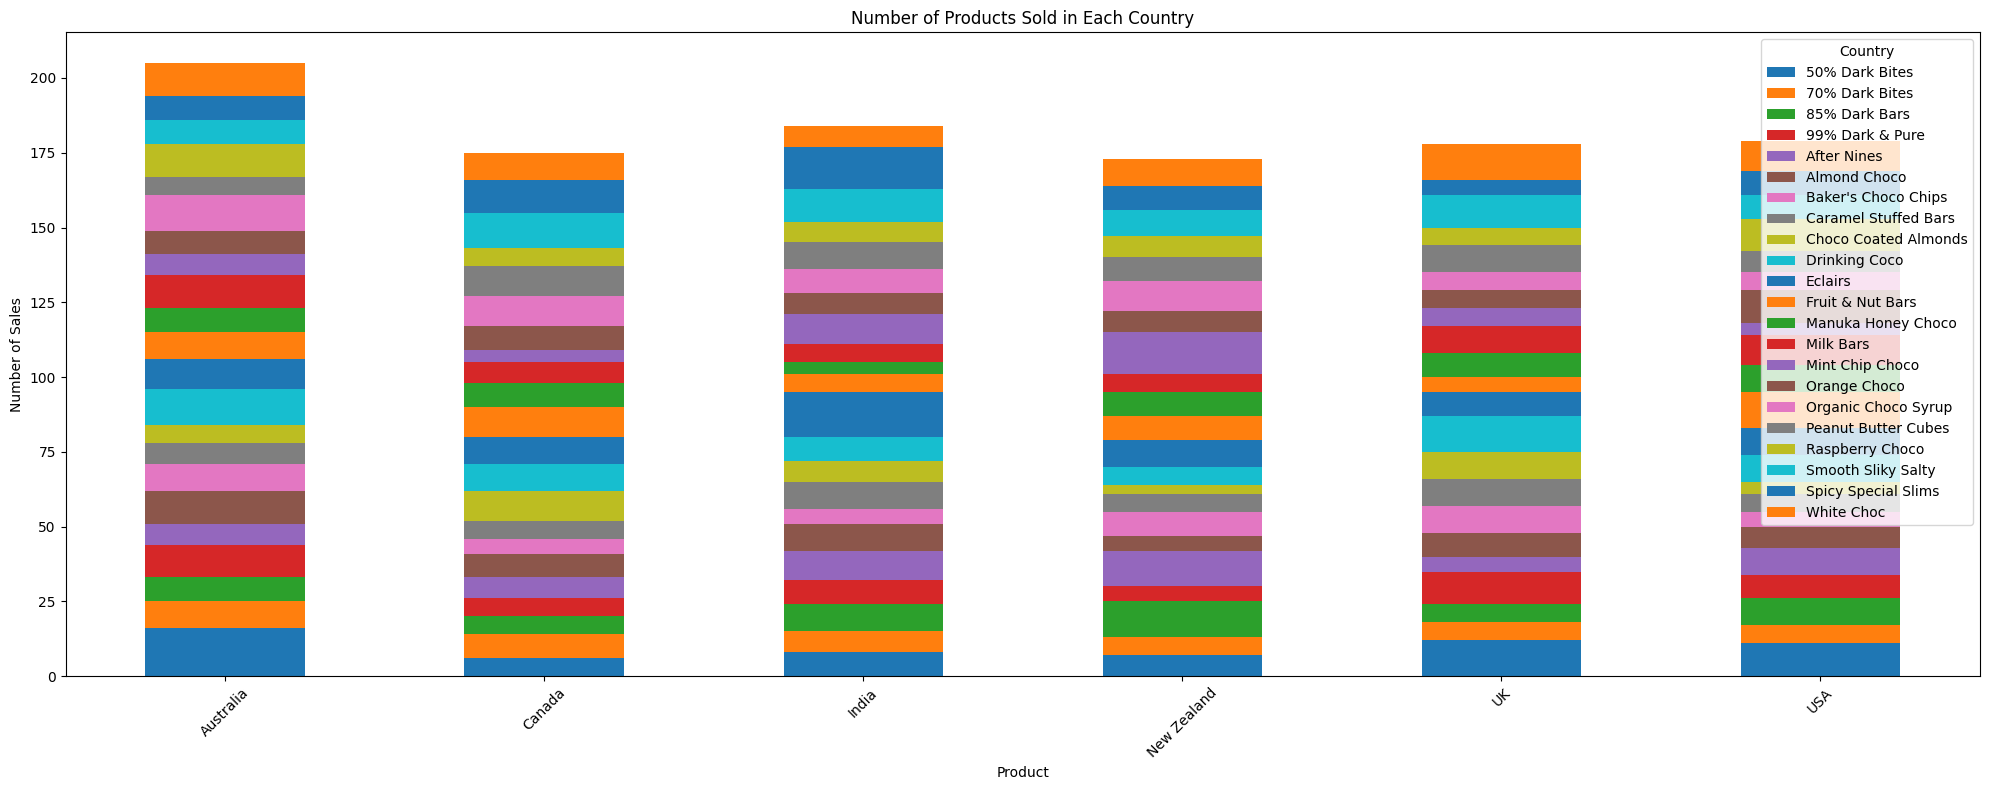

In [136]:
country_pro.plot(kind='bar', stacked=True, figsize=(20, 8))

# Adding labels and title
plt.title('Number of Products Sold in Each Country')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.show()

- What insights can you provide about the popularity of chocolate products (e.g., 50% Dark
Bites vs. Eclairs)? How can the company use this to adjust its production or marketing
strategy?

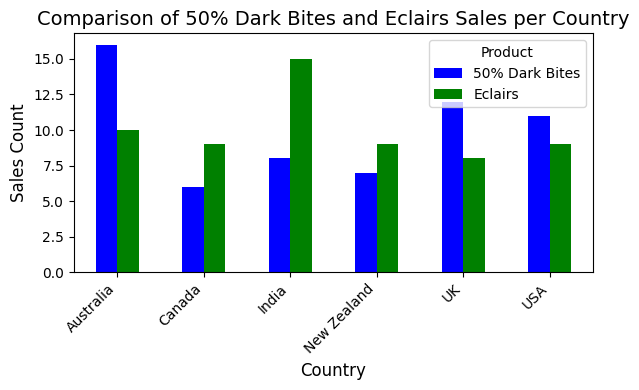

In [137]:
country_wise= country_pro[['50% Dark Bites','Eclairs']]
country_wise.plot(kind='bar', figsize=(6, 4), stacked=False, color=['blue', 'green'])

# Adding titles and labels
plt.title('Comparison of 50% Dark Bites and Eclairs Sales per Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()



- Are there seasonal patterns in chocolate sales (e.g., higher sales in certain months)? How
can the business use this information for inventory planning?

Stock more in June that should last for 2-3 months

</br>

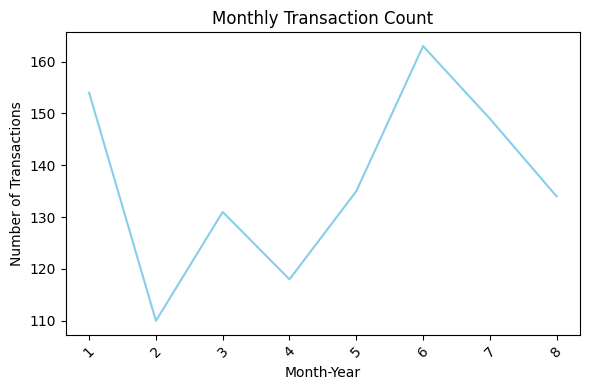

- If the company wants to increase revenue by 20%, how many additional boxes of
chocolate would need to be shipped, assuming the current average revenue per box
remains constant?

### Machine Learning

In [159]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
 7   Year           1094 non-null   int32         
 8   DayOfWeek      1094 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 64.2+ KB


In [160]:
data = chocolate_data.copy()
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,DayOfWeek
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,1,2022,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,8,2022,0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,7,2022,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4,2022,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2,2022,3
...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,5,2022,1
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,6,2022,1
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,7,2022,1
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,7,2022,3


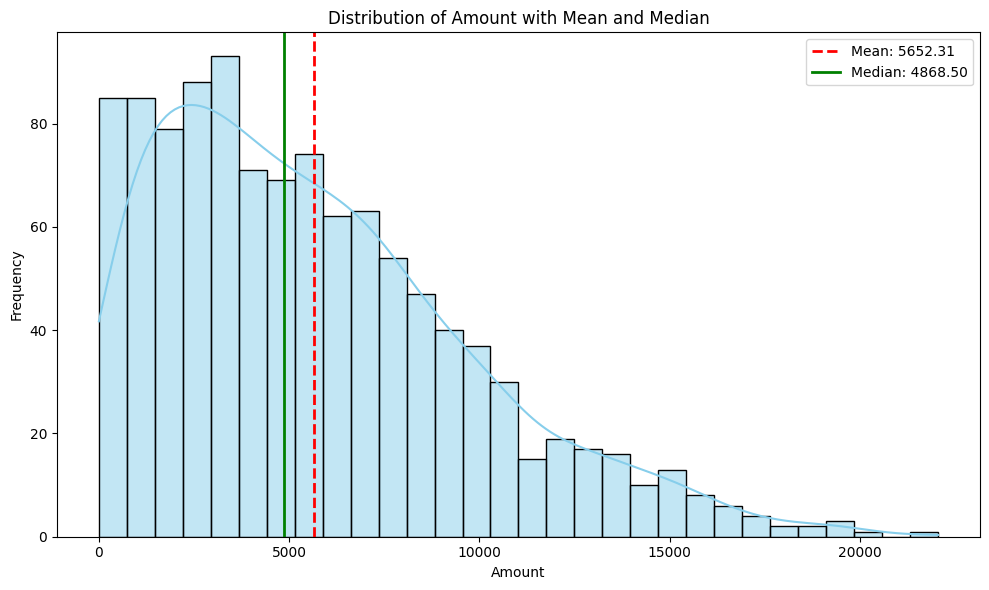

In [161]:

# Calculate mean and median
mean_val = data['Amount'].mean()
median_val = data['Amount'].median()

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=30, kde=True, color='skyblue')

# Plot mean line
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')

# Plot median line
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

# Labels and legend
plt.title('Distribution of Amount with Mean and Median')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [162]:
data['Revenue_Class'] = (data['Amount'] > data['Amount'].median()).astype(int)


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
 7   Year           1094 non-null   int32         
 8   DayOfWeek      1094 non-null   int32         
 9   Revenue_Class  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3)
memory usage: 72.8+ KB


<Axes: >

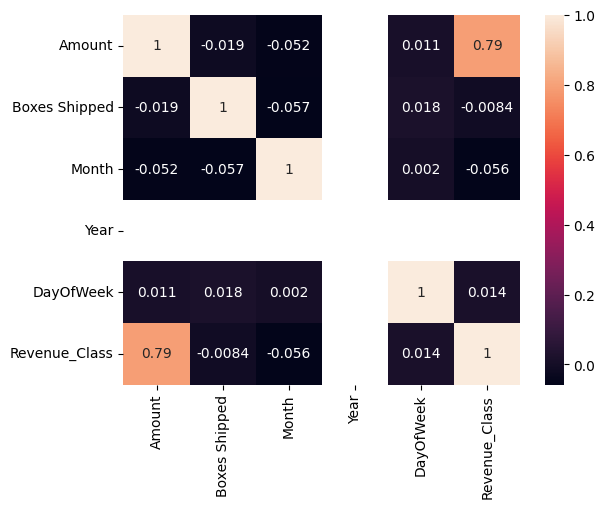

In [165]:
corr_class = data.corr(numeric_only=True)
sns.heatmap(corr_class, annot=True)

In [166]:
data=data.drop(['Date','Amount'], axis=1)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Boxes Shipped  1094 non-null   int64 
 4   Month          1094 non-null   int32 
 5   Year           1094 non-null   int32 
 6   DayOfWeek      1094 non-null   int32 
 7   Revenue_Class  1094 non-null   int64 
dtypes: int32(3), int64(2), object(3)
memory usage: 55.7+ KB


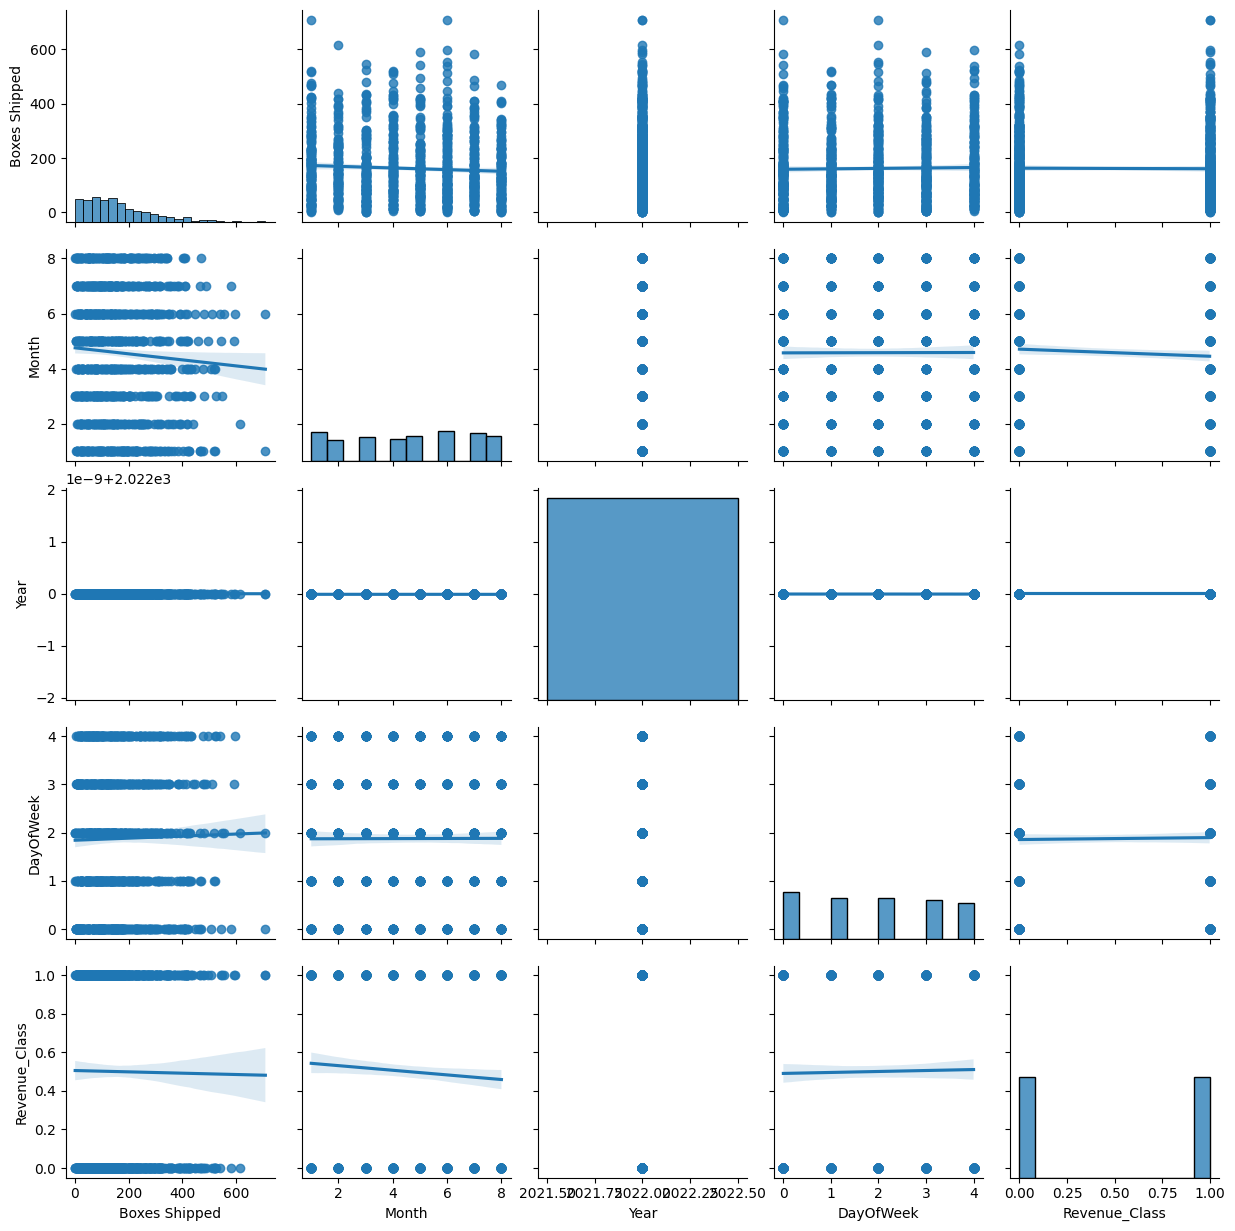

In [168]:
sns.pairplot(data, kind='reg')

### Encoding

In [169]:
data_encoded = pd.get_dummies(data, columns=['Sales Person', 'Country', 'Product'], drop_first=True)


In [170]:
X = data_encoded.drop(columns='Revenue_Class')
y = data_encoded['Revenue_Class']


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [175]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[59 47]
 [55 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54       106
           1       0.55      0.51      0.53       113

    accuracy                           0.53       219
   macro avg       0.53      0.53      0.53       219
weighted avg       0.54      0.53      0.53       219

Accuracy Score: 0.5342465753424658


In [449]:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_scaled, y_train)

# y_pred = knn.predict(X_test_scaled)

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [450]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)

# y_pred = knn.predict(X_test_scaled)

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[59 47]
 [51 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       106
           1       0.57      0.55      0.56       113

    accuracy                           0.55       219
   macro avg       0.55      0.55      0.55       219
weighted avg       0.55      0.55      0.55       219

Accuracy Score: 0.5525114155251142


In [451]:
# dummy = DummyClassifier(strategy='most_frequent')
# dummy.fit(X_train_scaled, y_train)
# y_dummy_pred = dummy.predict(X_test_scaled)

# null_accuracy = accuracy_score(y_test, y_dummy_pred)
# print(f"Null Accuracy: {null_accuracy:.4f}")


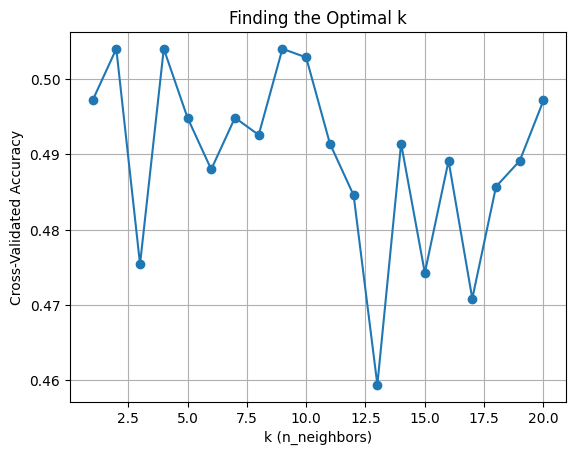

In [456]:
# k_values = list(range(1, 21))
# scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
#     scores.append(score)

# plt.plot(k_values, scores, marker='o')
# plt.xlabel('k (n_neighbors)')
# plt.ylabel('Cross-Validated Accuracy')
# plt.title('Finding the Optimal k')
# plt.grid(True)
# plt.show()


In [461]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


Confusion Matrix:
 [[49 57]
 [58 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46       106
           1       0.49      0.49      0.49       113

    accuracy                           0.47       219
   macro avg       0.47      0.47      0.47       219
weighted avg       0.48      0.47      0.47       219


Accuracy: 0.4749


### Results are unsatifactory so I will rethink my feature selection

In [553]:
data

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year,DayOfWeek,Revenue_Class
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,1,2022,1,1
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,8,2022,0,1
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,7,2022,3,0
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,4,2022,2,1
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,2,2022,3,1
...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,4410.0,323,5,2022,1,0
1090,Jehu Rudeforth,USA,White Choc,6559.0,119,6,2022,1,1
1091,Ches Bonnell,Canada,Organic Choco Syrup,574.0,217,7,2022,1,0
1092,Dotty Strutley,India,Eclairs,2086.0,384,7,2022,3,0


In [554]:
data_encoded = pd.get_dummies(data, columns=['Sales Person', 'Country', 'Product'], drop_first=True)

In [555]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Amount                            1094 non-null   float64
 1   Boxes Shipped                     1094 non-null   int64  
 2   Month                             1094 non-null   int32  
 3   Year                              1094 non-null   int32  
 4   DayOfWeek                         1094 non-null   int32  
 5   Revenue_Class                     1094 non-null   int64  
 6   Sales Person_Barr Faughny         1094 non-null   bool   
 7   Sales Person_Beverie Moffet       1094 non-null   bool   
 8   Sales Person_Brien Boise          1094 non-null   bool   
 9   Sales Person_Camilla Castle       1094 non-null   bool   
 10  Sales Person_Ches Bonnell         1094 non-null   bool   
 11  Sales Person_Curtice Advani       1094 non-null   bool   
 12  Sales 

In [556]:
num_col = data.select_dtypes(include=['float64','int64', 'int32']).columns
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [559]:
corr_mat = data.corr(numeric_only=True)
price_corr = corr_mat['Revenue_Class'].sort_values(ascending=False)
price_corr

Revenue_Class    1.000000
Amount           0.792259
DayOfWeek        0.014215
Boxes Shipped   -0.008359
Month           -0.055664
Year                  NaN
Name: Revenue_Class, dtype: float64

### Random Forest

### Despite re-thinking I have no relevant features. 

In [561]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.502283105022831

Confusion Matrix:
 [[46 60]
 [49 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.43      0.46       106
           1       0.52      0.57      0.54       113

    accuracy                           0.50       219
   macro avg       0.50      0.50      0.50       219
weighted avg       0.50      0.50      0.50       219



In [572]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=44)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.5114155251141552

Confusion Matrix:
 [[48 58]
 [49 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.45      0.47       106
           1       0.52      0.57      0.54       113

    accuracy                           0.51       219
   macro avg       0.51      0.51      0.51       219
weighted avg       0.51      0.51      0.51       219



In [574]:

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))


Accuracy: 0.4748858447488584

Confusion Matrix:
 [[51 55]
 [60 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.48      0.47       106
           1       0.49      0.47      0.48       113

    accuracy                           0.47       219
   macro avg       0.48      0.48      0.47       219
weighted avg       0.48      0.47      0.47       219



In [578]:
data_for_kmeans= data_encoded


In [579]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_kmeans)

In [581]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

data_for_kmeans['Cluster'] = kmeans.labels_


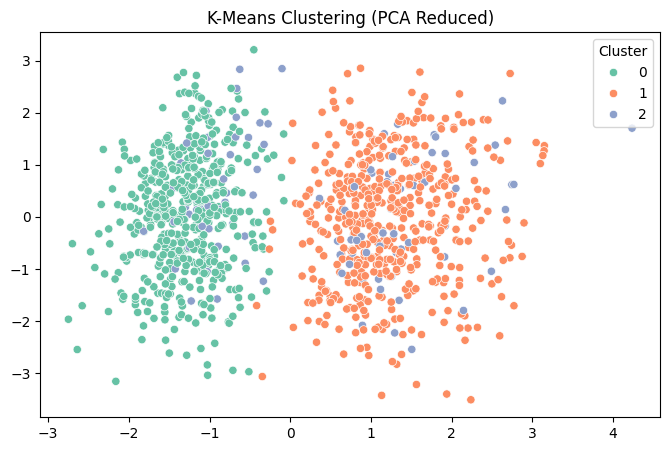

In [583]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data_for_kmeans['Cluster'], palette='Set2')
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()
